- Install Jupyter notebook √
- Supervised, Unsupervised √
- Regression, Classification √
- Discrete, Continuous √
- Outliers
- Linear Regression
- Base line of Discrete variables (coefficient difference between base line and variable)
- Gradient Descent
- Train, Test set
- Basic Metrics, Rsquared and Accuracy
- Overfit, Underfit
- Bias, Variance
- Correlation
- Feature Scaling

A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns

In [2]:
df = pd.read_csv("house_price_random.csv")

In [3]:
df.head()

,area,rooms,bathrooms,price
0,2894.520669,3,3,663777.421475
1,3419.059422,2,3,756874.966437
2,3285.665043,2,3,726469.887676
3,3238.470273,3,4,735771.451165
4,3007.214358,3,3,684045.335992


Text(0.5,1,'Price vs Area')

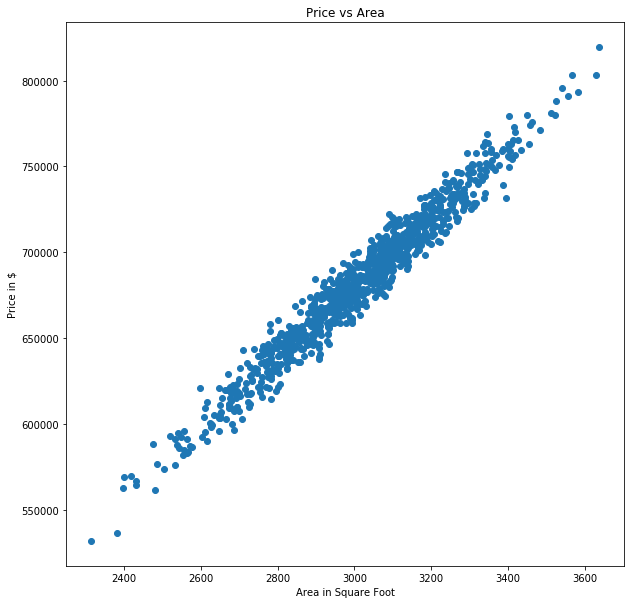

In [4]:
plt.figure(figsize=(10,10))
plt.scatter(df['area'], df['price'])
plt.xlabel("Area in Square Foot")
plt.ylabel("Price in $")
plt.title("Price vs Area")

In [32]:
X = df.iloc[:,0:1].copy()

In [43]:
X = df.iloc[:,0:3].copy()
Y = df['price'].copy()

# For dataset rows < 100,000 . use 80:20 Train:Test split

# For dataset rows > 1,000,000. you can use 98:2 Train:test split

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [45]:
linear_fit = LinearRegression().fit(X_train, Y_train)

In [47]:
linear_fit.score(X_test, Y_test)

0.9634486136920174

# .score calculates the R-squared value. R-squared explains the variation in the output by the input.

# Here the input explains 96% of the variation in the output

In [48]:
preds = linear_fit.predict(X_test)

In [49]:
r2_score(Y_test, preds)

0.9634486136920174

In [50]:
linear_fit.coef_

array([ 201.02956088, 2953.26740424, 4656.39086985])

In [51]:
linear_fit.intercept_

57591.263917499804

In [134]:
from sklearn.datasets import load_boston
boston_dict = load_boston()

In [136]:
boston = pd.DataFrame(boston_dict.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dict.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [137]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

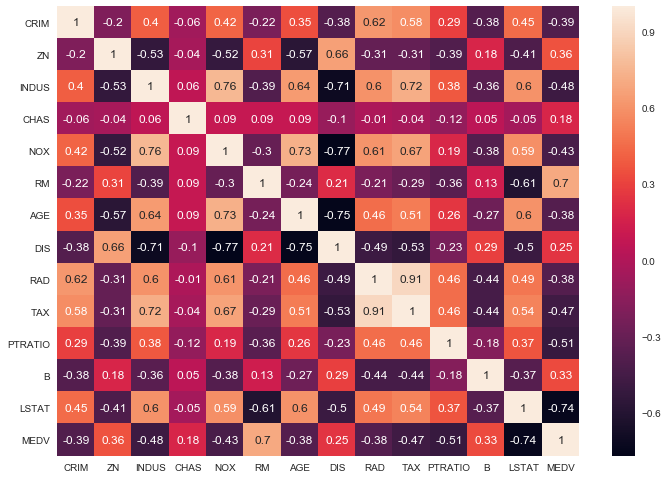

In [132]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)